In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import xarray as xr
from tqdm import tqdm
from scipy.constants import c
from interleaver_2_stages import interleaver_2_stage_calc, calculate_spectrum_bandwidth

In [2]:
gf45clo_pdk_sin_neff_ng_variability = xr.open_dataset("gf45clo_pdk_sin_neff_ng_variability.nc")
gf45clo_pdk_sin_neff_ng_variability

<xarray.Dataset>
Dimensions:                (num_samples: 500, wg_width_median_array: 6)
Coordinates:
  * num_samples            (num_samples) int32 0 1 2 3 4 ... 495 496 497 498 499
  * wg_width_median_array  (wg_width_median_array) float64 0.8 1.4 ... 4.0 5.0
Data variables:
    wg_width               (wg_width_median_array, num_samples) float64 ...
    wg_height              (wg_width_median_array, num_samples) float64 ...
    wg_sidewall_angle      (wg_width_median_array, num_samples) float64 ...
    wg_width_median        (wg_width_median_array, num_samples) float64 ...
    neff_freq0             (wg_width_median_array, num_samples) float32 ...
    neff_dfreq             (wg_width_median_array, num_samples) float64 ...
    ng_freq0               (wg_width_median_array, num_samples) float32 ...
    ng_dfreq               (wg_width_median_array, num_samples) float64 ...
Attributes:
    description:  gf45clo_pdk_sin_neff_ng_variability

In [3]:
XPS_first_stage_loss_dB   = 0.07
XPS_second_stage_loss_dB  = 0.07
XPS_third_stage_loss_dB   = 0.07
SiN_propagation_loss_dB_m = 40
SiN_directional_coupler_loss_dB = 0.02

SiN_group_index = []
SiN_effective_index = []
for width in gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values:
  SiN_group_index.append(np.median(gf45clo_pdk_sin_neff_ng_variability.sel(wg_width_median_array=width)['ng_freq0'].values))
  SiN_effective_index.append(np.median(gf45clo_pdk_sin_neff_ng_variability.sel(wg_width_median_array=width)['neff_freq0'].values))

center_wavelength = 1310e-9
freq = c/(center_wavelength)
FSR_wavelength = 1600e9 * (center_wavelength)**2/(c)
channel_spacing = FSR_wavelength/8
channel1_wavelength = center_wavelength - 3.5*channel_spacing
channel2_wavelength = center_wavelength - 2.5*channel_spacing
channel3_wavelength = center_wavelength - 1.5*channel_spacing
channel4_wavelength = center_wavelength - 0.5*channel_spacing
channel5_wavelength = center_wavelength + 0.5*channel_spacing
channel6_wavelength = center_wavelength + 1.5*channel_spacing
channel7_wavelength = center_wavelength + 2.5*channel_spacing
channel8_wavelength = center_wavelength + 3.5*channel_spacing
channel_wavelength_array = [
    channel1_wavelength,
    channel2_wavelength,
    channel3_wavelength,
    channel4_wavelength,
    channel5_wavelength,
    channel6_wavelength,
    channel7_wavelength,
    channel8_wavelength,
]

dL_400Ghz_FSR = []

for idd_width, width in enumerate(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values):
  dL_400Ghz_FSR.append((center_wavelength)**2/(SiN_group_index[idd_width] * FSR_wavelength/4))

optimization_wavelength_sweep = np.linspace(1295e-9,1325e-9,num=4000)
cost_function_plot_alpha = 0.3
bounds_epsilon = 5e-3

In [4]:
num_sweep = len(gf45clo_pdk_sin_neff_ng_variability['num_samples'].values)

channel_offset_list = [0e9, 10e9, 20e9, 30e9, 40e9, 50e9, 60e9, 70e9]

random_variable_sigma = [0.02, 0.05, 0.1]
dc_variability = ["common"]
simulation = ["montecarlo"]

rand_dc1 = {}
rand_dc2 = {}
rand_dc3 = {}

for sigma in random_variable_sigma:
    rand_dc1[sigma] = 1+np.random.normal(0, sigma, num_sweep)
    rand_dc2[sigma] = 1+np.random.normal(0, sigma, num_sweep)
    rand_dc3[sigma] = 1+np.random.normal(0, sigma, num_sweep)

Idd_width:  0  Width:  0.8 um
dL for 400Ghz FSR:  0.00038832594981383015
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000    0.093714 -1.657314  5329.161245
  10    0.499920    0.635000    0.895520    0.093031 -1.761261  5195.625611
  20    0.495000    0.628107    0.896629    0.099393 -2.247040  4869.969576
  30    0.495683    0.631431    0.896549    0.100649 -2.455728  4781.319781
  40    0.497688    0.635000    0.895000    0.089704 -2.674794  4720.877265
  50    0.495000    0.635000    0.895132    0.088584 -2.596412  4730.140259
  60    0.497363    0.635000    0.895000    0.084120 -2.751033  4718.155592
  70    0.499589    0.635000    0.895010    0.069968 -2.824623  4718.277960
  80    0.505000    0.635000    0.895044    0.015826 -2.847227  4702.316944
  90    0.505000    0.635000    0.895143   -0.158105 -2.924917  4628.552290
 100    0.505000    0.635000    0.895651   -1.065569 -3.690927  3655.759110
 110    0.505000    0.63

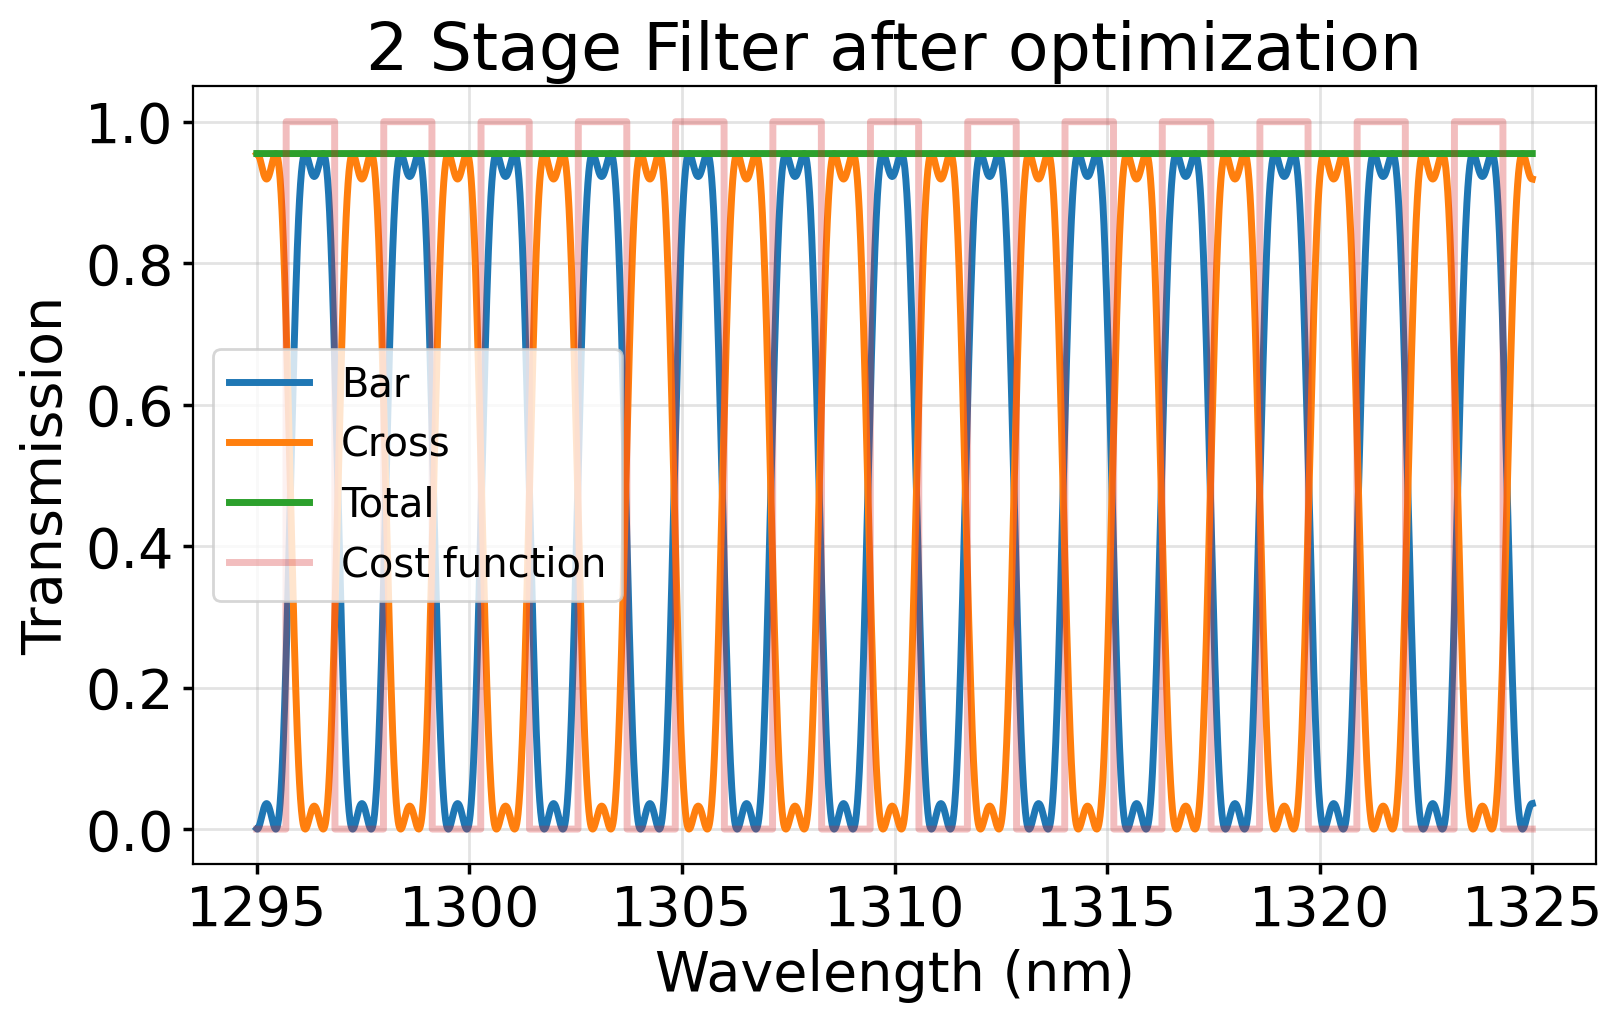

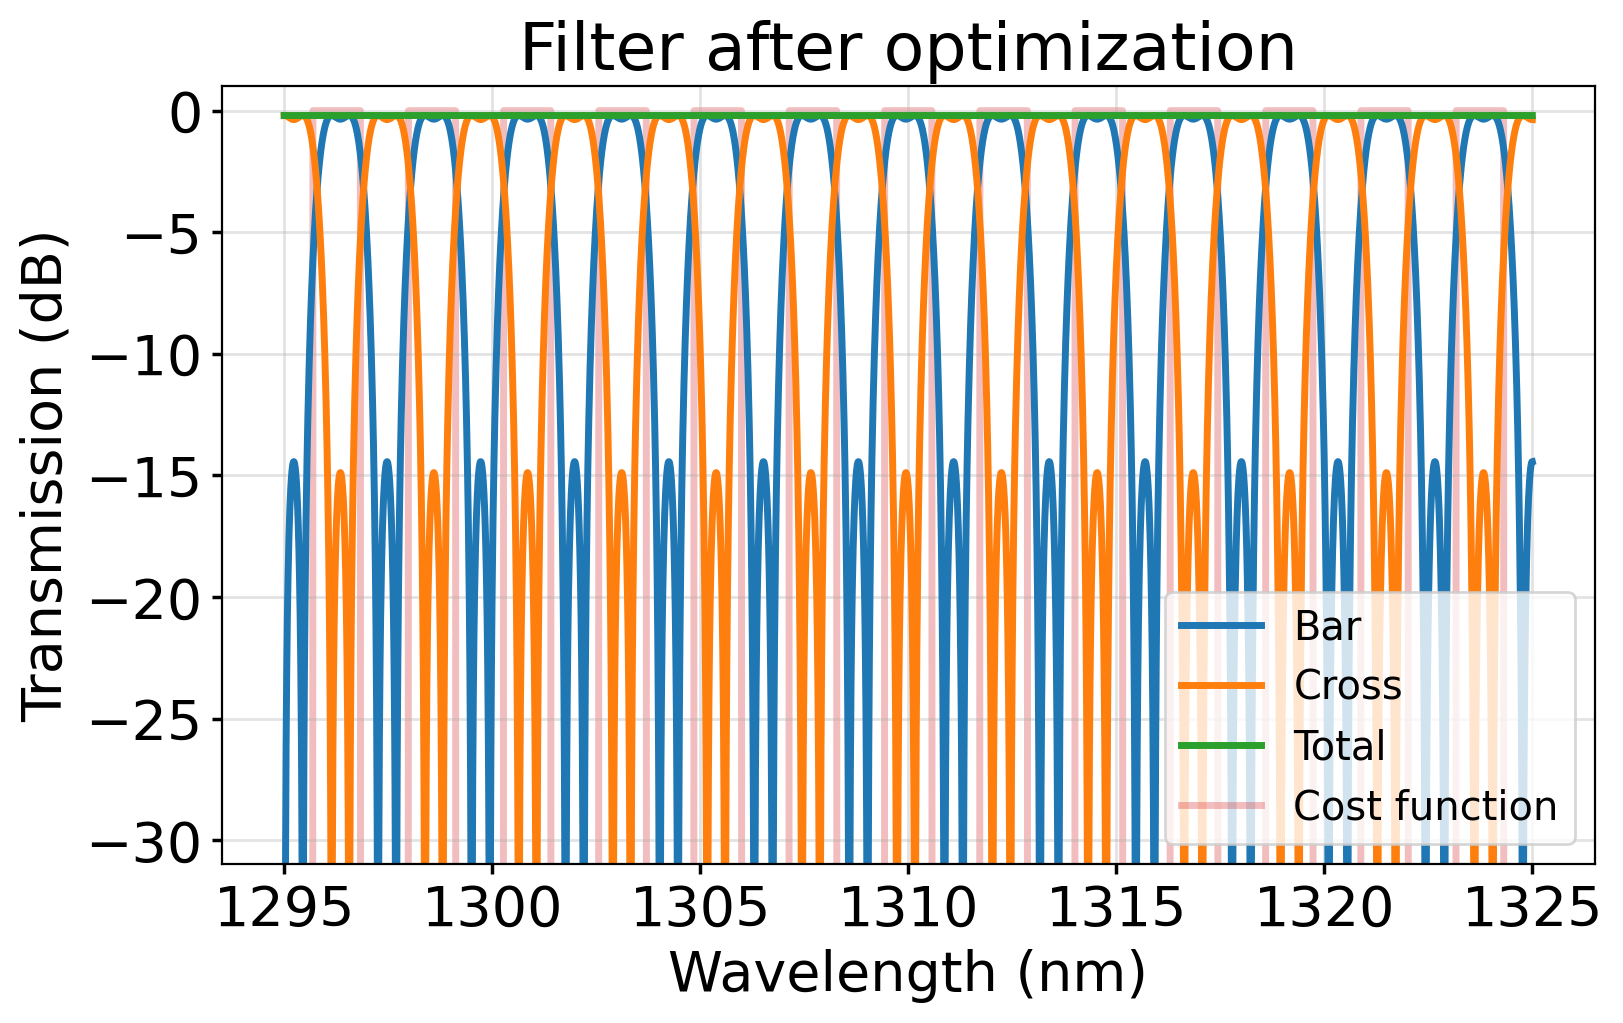

100%|██████████| 500/500 [05:28<00:00,  1.52it/s]


Idd_width:  1  Width:  1.4 um
dL for 400Ghz FSR:  0.00038390305363661766
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000   -2.078461 -0.727084  3933.557031
  10    0.501032    0.635000    0.898152   -2.249560 -0.684331  3417.430629
  20    0.499014    0.625303    0.900339   -2.790370 -0.571035  2072.372556
  30    0.496281    0.627121    0.901446   -3.257554 -0.478104  1418.521359
  40    0.496779    0.626618    0.902260   -3.559563 -0.389664  1346.500975
  50    0.496848    0.626457    0.901216   -3.515073 -0.402709  1339.905957
  60    0.499886    0.625982    0.896009   -3.515526 -0.485219  1293.328309
  70    0.501683    0.628675    0.896487   -3.694958 -0.613055  1231.568203
  80    0.505000    0.631500    0.897736   -3.737755 -1.170529  1058.788251
  90    0.504702    0.630675    0.896412   -3.685583 -1.215489  1063.831892
 100    0.504760    0.630716    0.896351   -3.717375 -1.212503  1059.222213
 110    0.504874    0.63

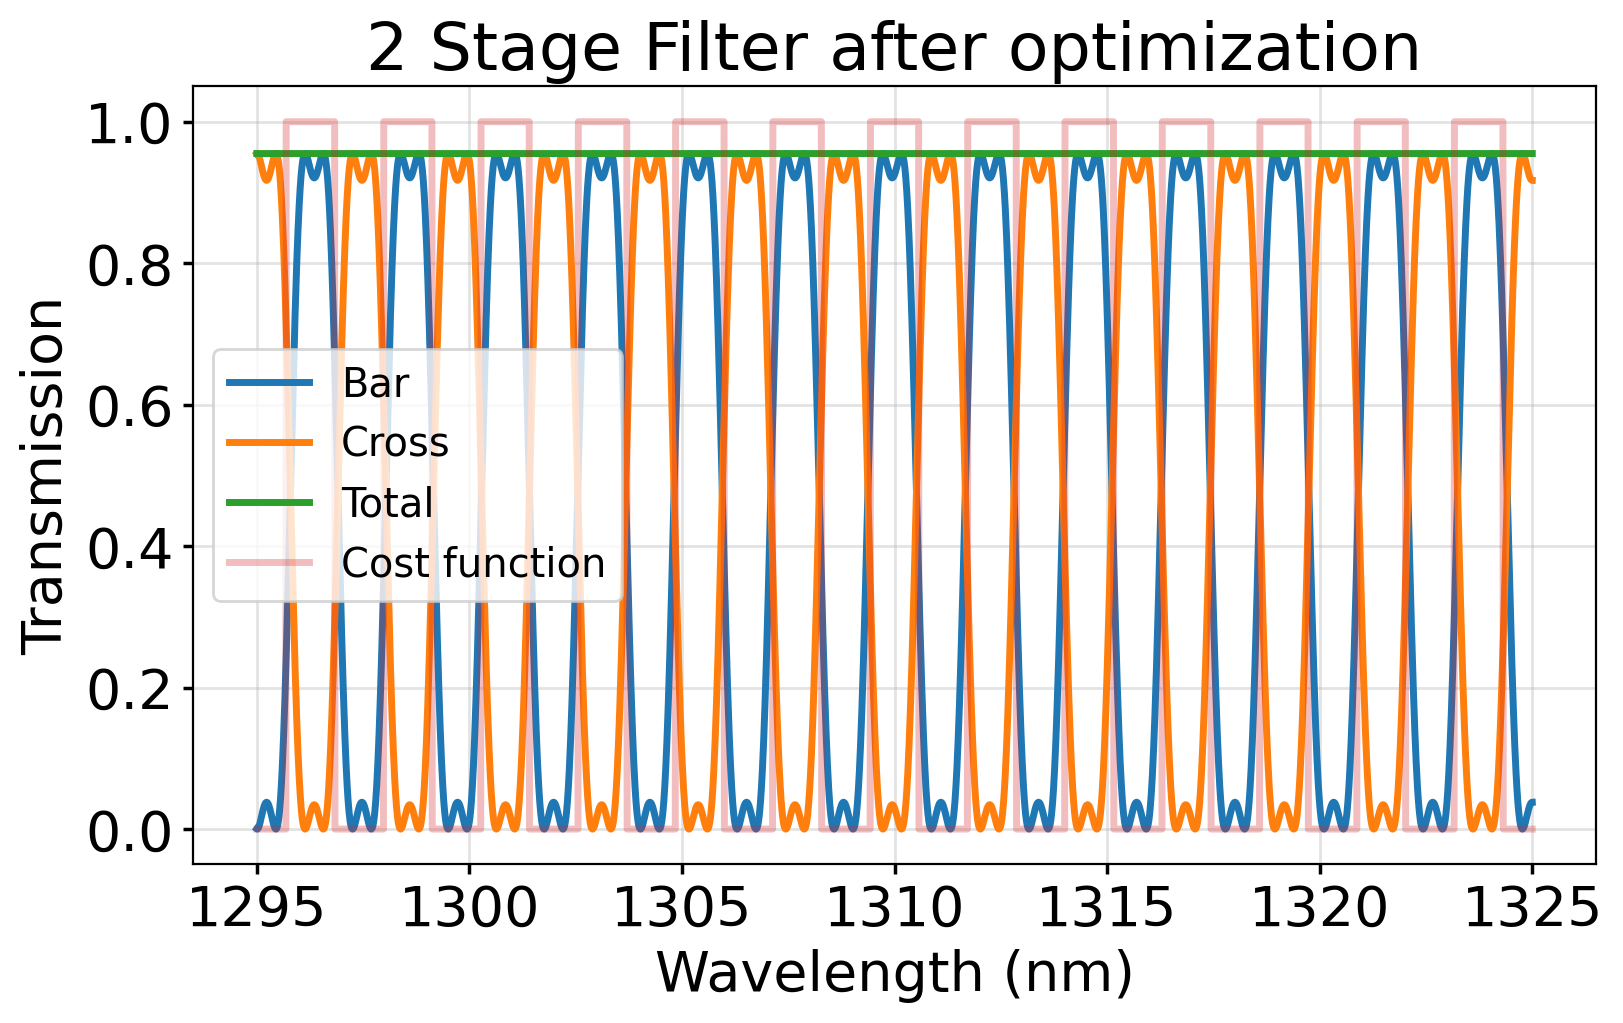

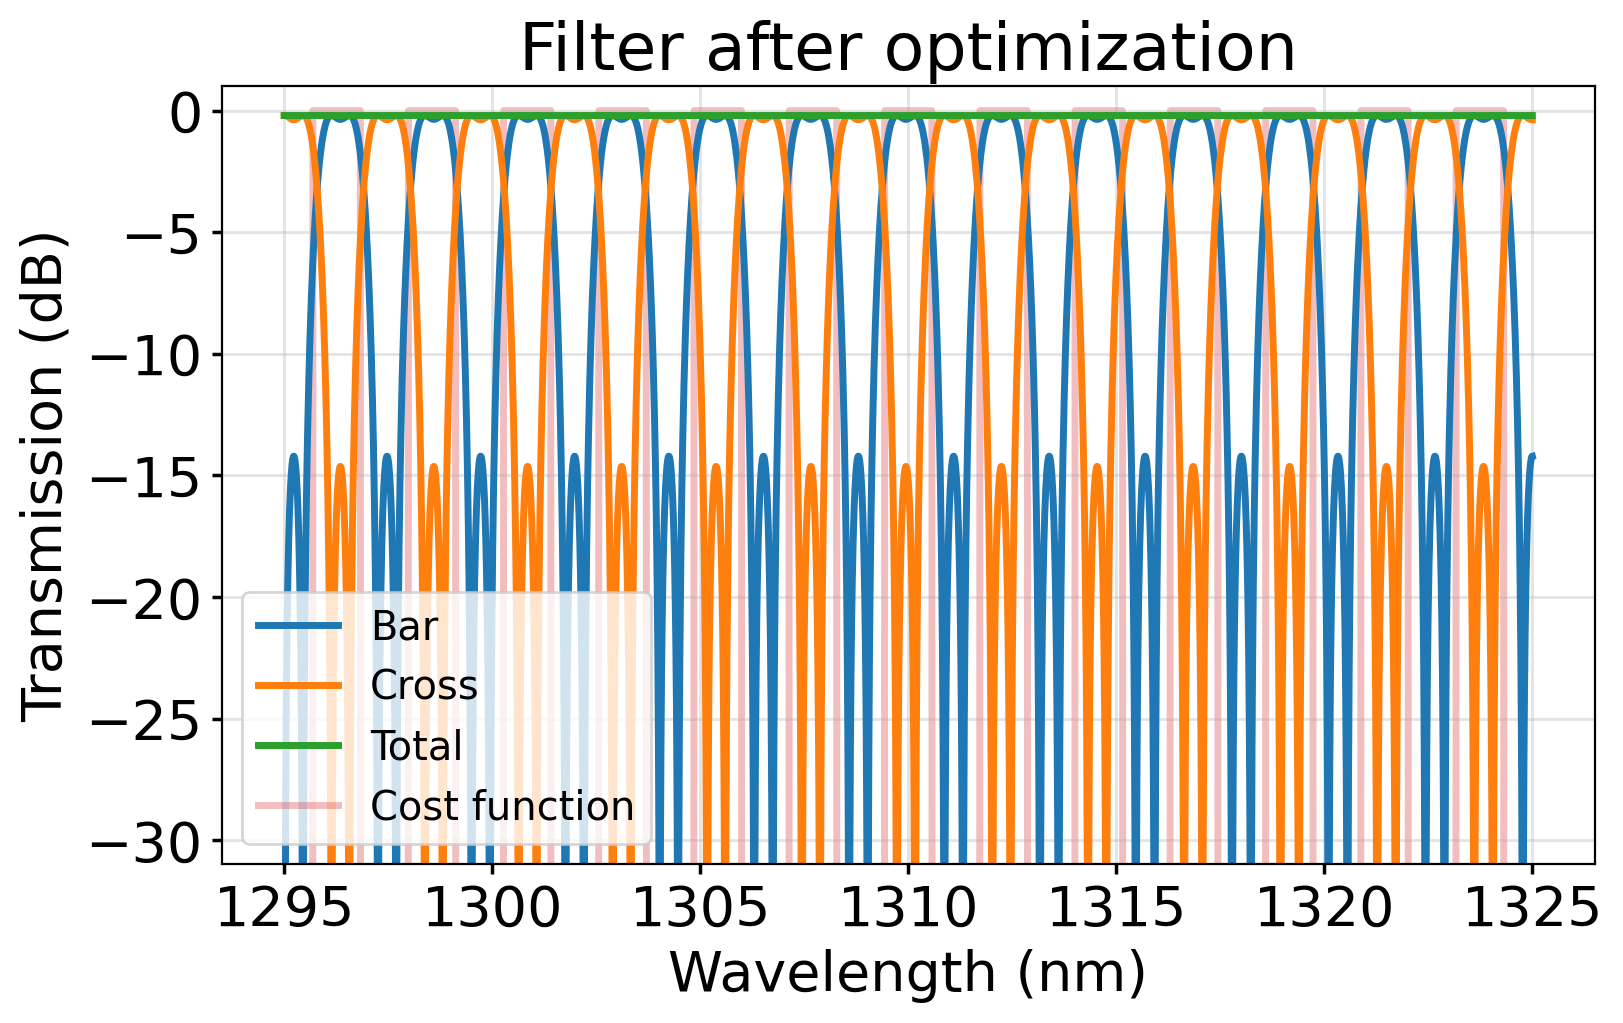

100%|██████████| 500/500 [05:38<00:00,  1.48it/s]


Idd_width:  2  Width:  2.0 um
dL for 400Ghz FSR:  0.00038532111477110385
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000   -1.617527  1.671902  5706.248644
  10    0.505000    0.635000    0.899552   -1.641337  1.540825  5570.436697
  20    0.498554    0.634199    0.898609   -1.768301  0.611307  4818.668557
  30    0.495274    0.625000    0.897333   -2.154304 -0.778768  4551.163812
  40    0.497933    0.625000    0.896386   -2.490005 -1.219298  4176.078278
  50    0.502019    0.625740    0.897998   -4.333244 -5.108076  3015.595277
  60    0.502406    0.625857    0.897107   -4.099936 -4.501009  2779.833384
  70    0.504472    0.629433    0.898182   -4.259942 -3.251073  1373.407977
  80    0.504669    0.629892    0.897864   -4.415422 -3.258684  1242.493175
  90    0.504730    0.631358    0.897480   -4.391058 -2.625448  1080.520705
 100    0.504704    0.631403    0.897817   -4.538643 -2.877456  1063.462226
 110    0.504673    0.63

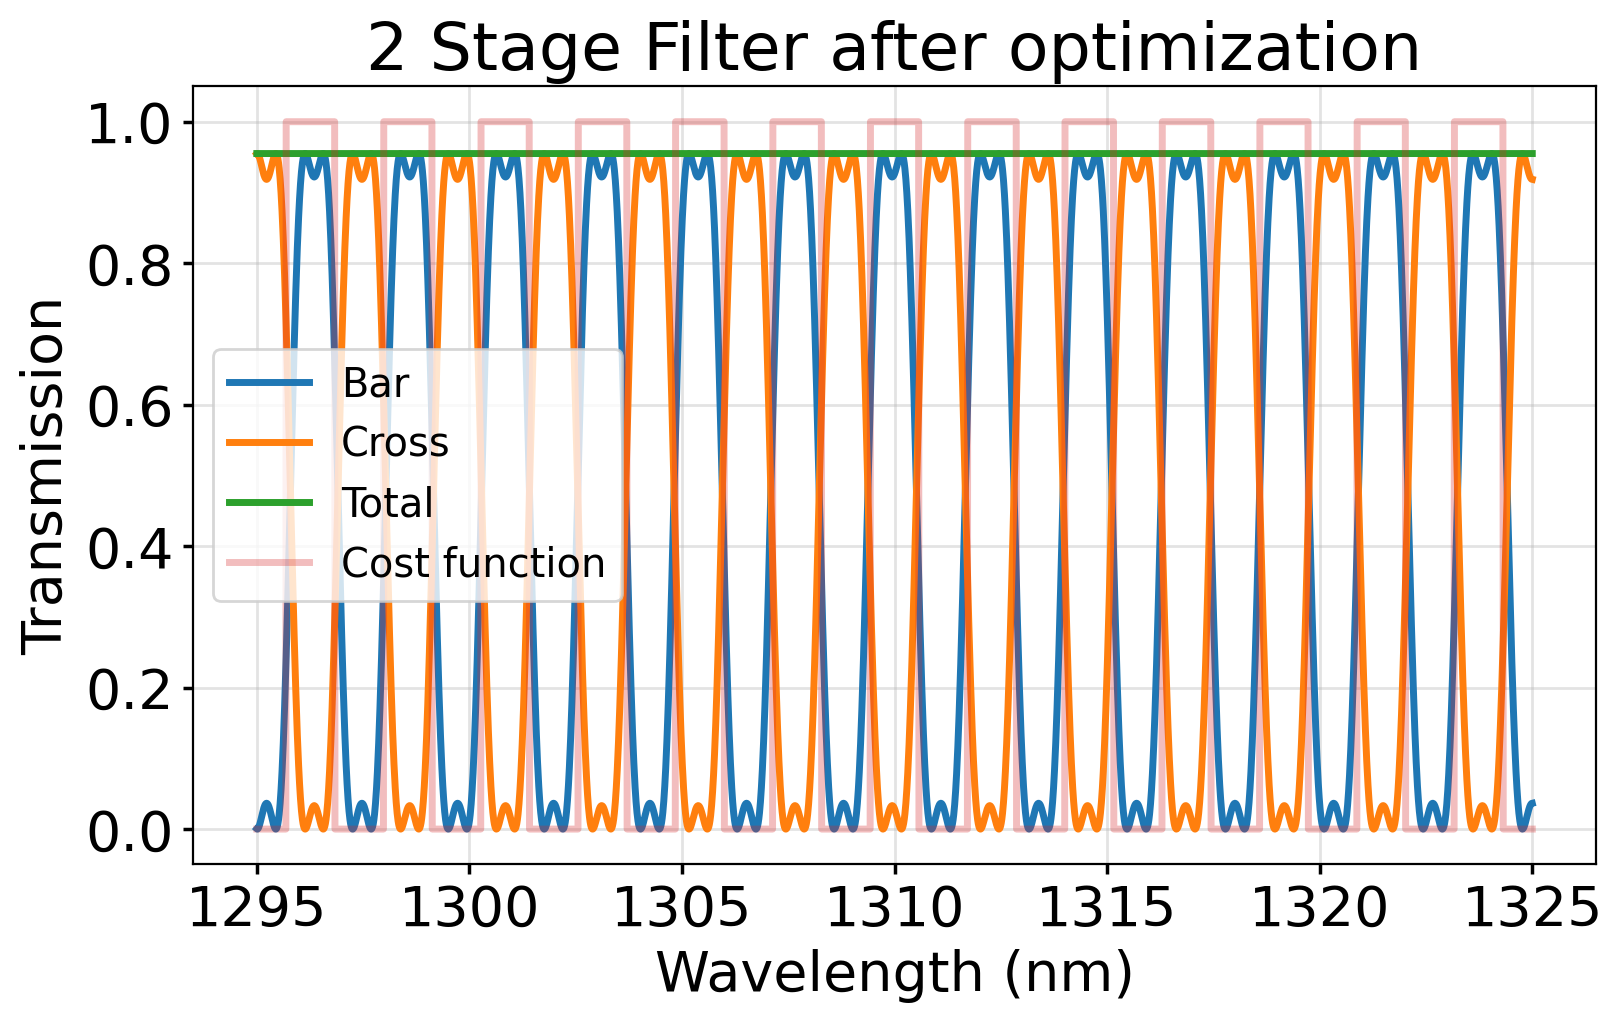

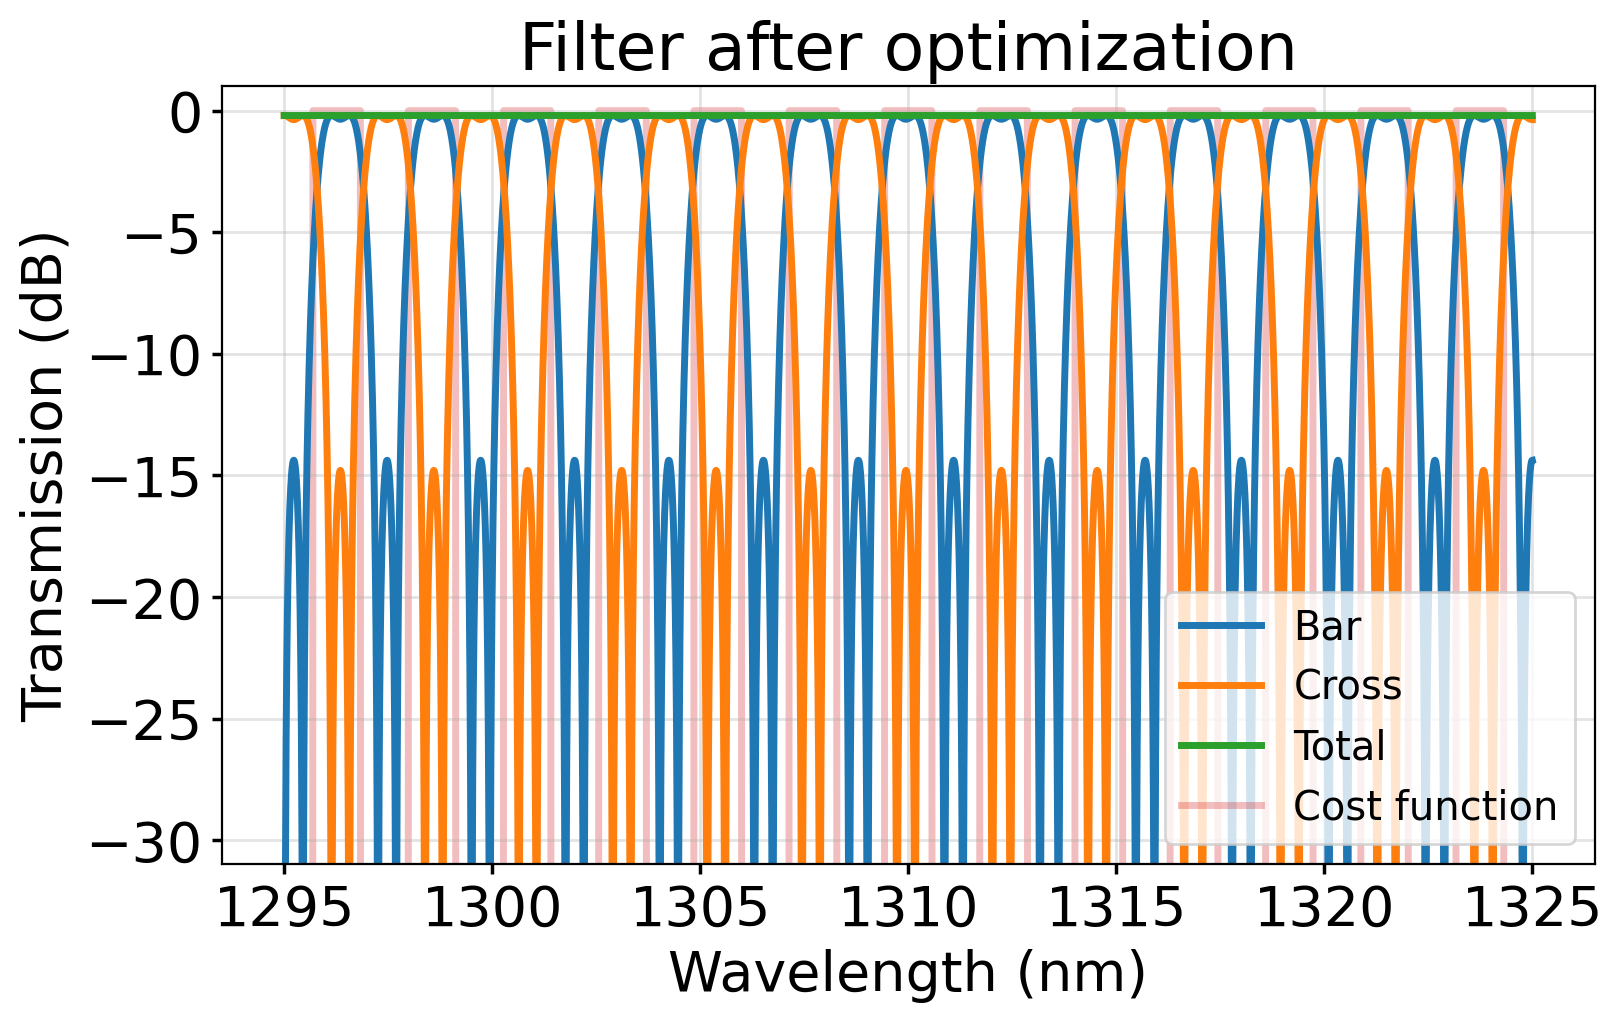

100%|██████████| 500/500 [05:36<00:00,  1.49it/s]


Idd_width:  3  Width:  3.0 um
dL for 400Ghz FSR:  0.00038694435003443233
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000   -1.863538 -0.744528  4919.821612
  10    0.495232    0.635000    0.898152   -2.016944 -0.700750  4557.094745
  20    0.495147    0.625303    0.900339   -2.501831 -0.584735  3541.573516
  30    0.498127    0.628975    0.899914   -4.064586 -0.237524  2400.669594
  40    0.499469    0.625000    0.898810   -3.935923 -0.279466  2313.064576
  50    0.495889    0.628288    0.901657   -3.748475 -0.395997  2169.316394
  60    0.495000    0.635000    0.897299   -3.428829 -0.995443  1883.846356
  70    0.496295    0.633972    0.900750   -3.401185 -1.643020  1806.050702
  80    0.498023    0.631644    0.905000   -3.828528 -1.764322  1242.338609
  90    0.503543    0.626798    0.903647   -4.502722 -2.525672  1173.556853
 100    0.500886    0.628673    0.904352   -4.169125 -2.080866  1061.538078
 110    0.500696    0.62

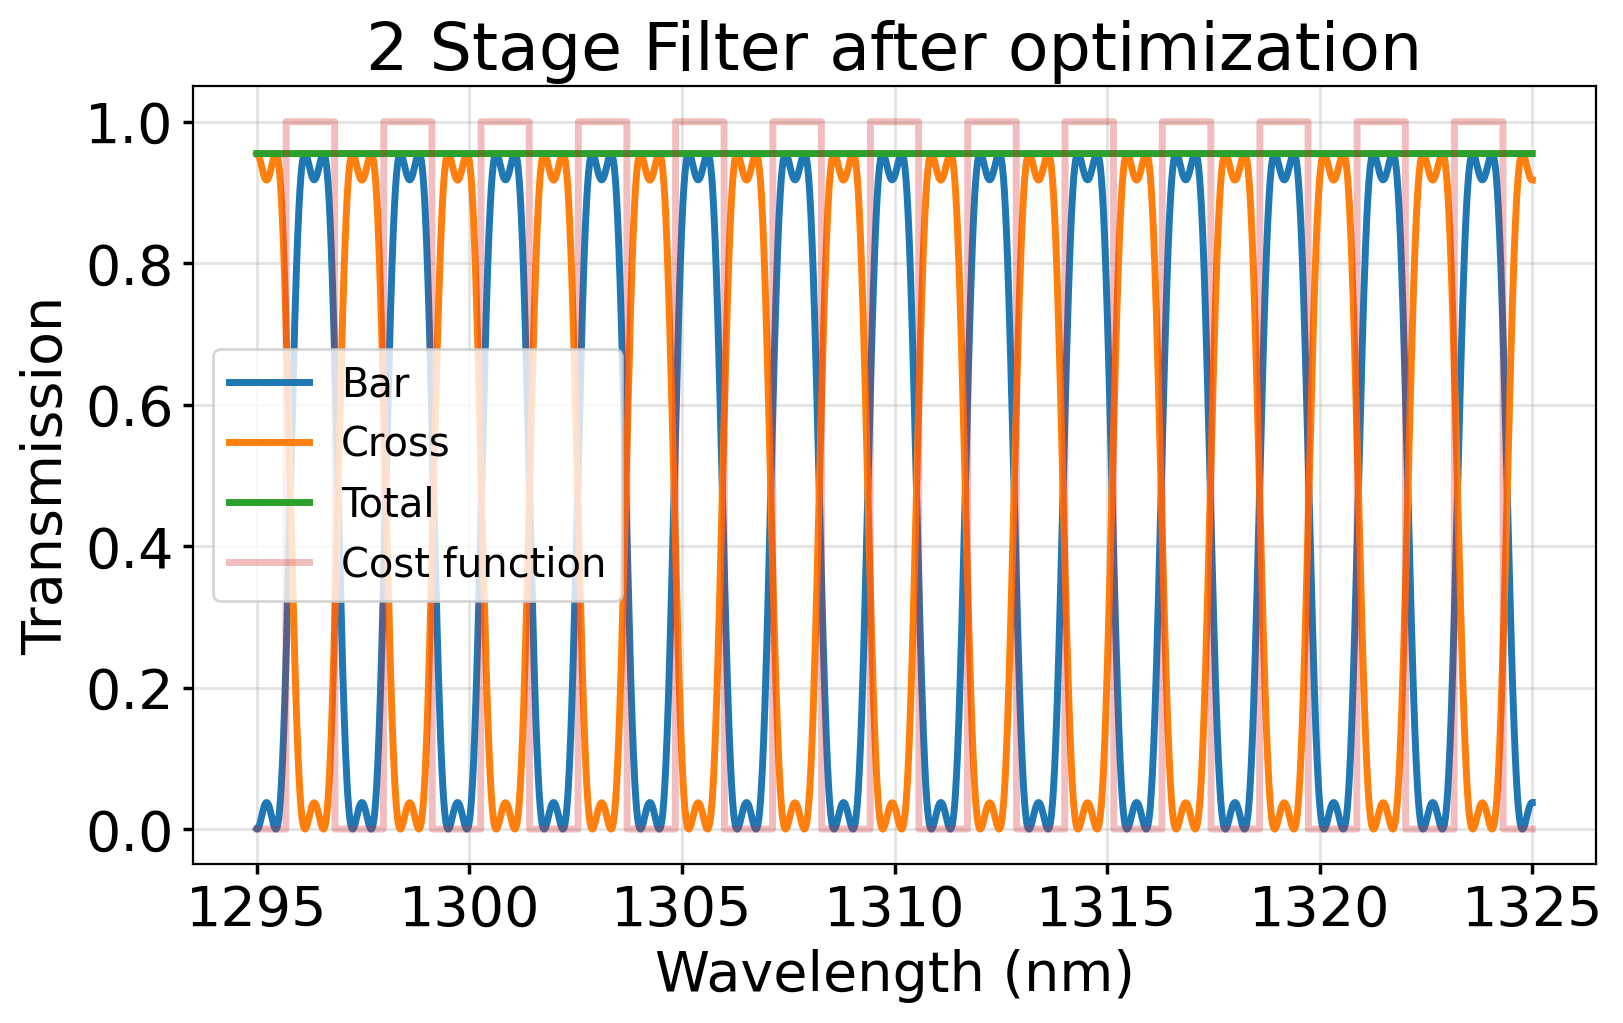

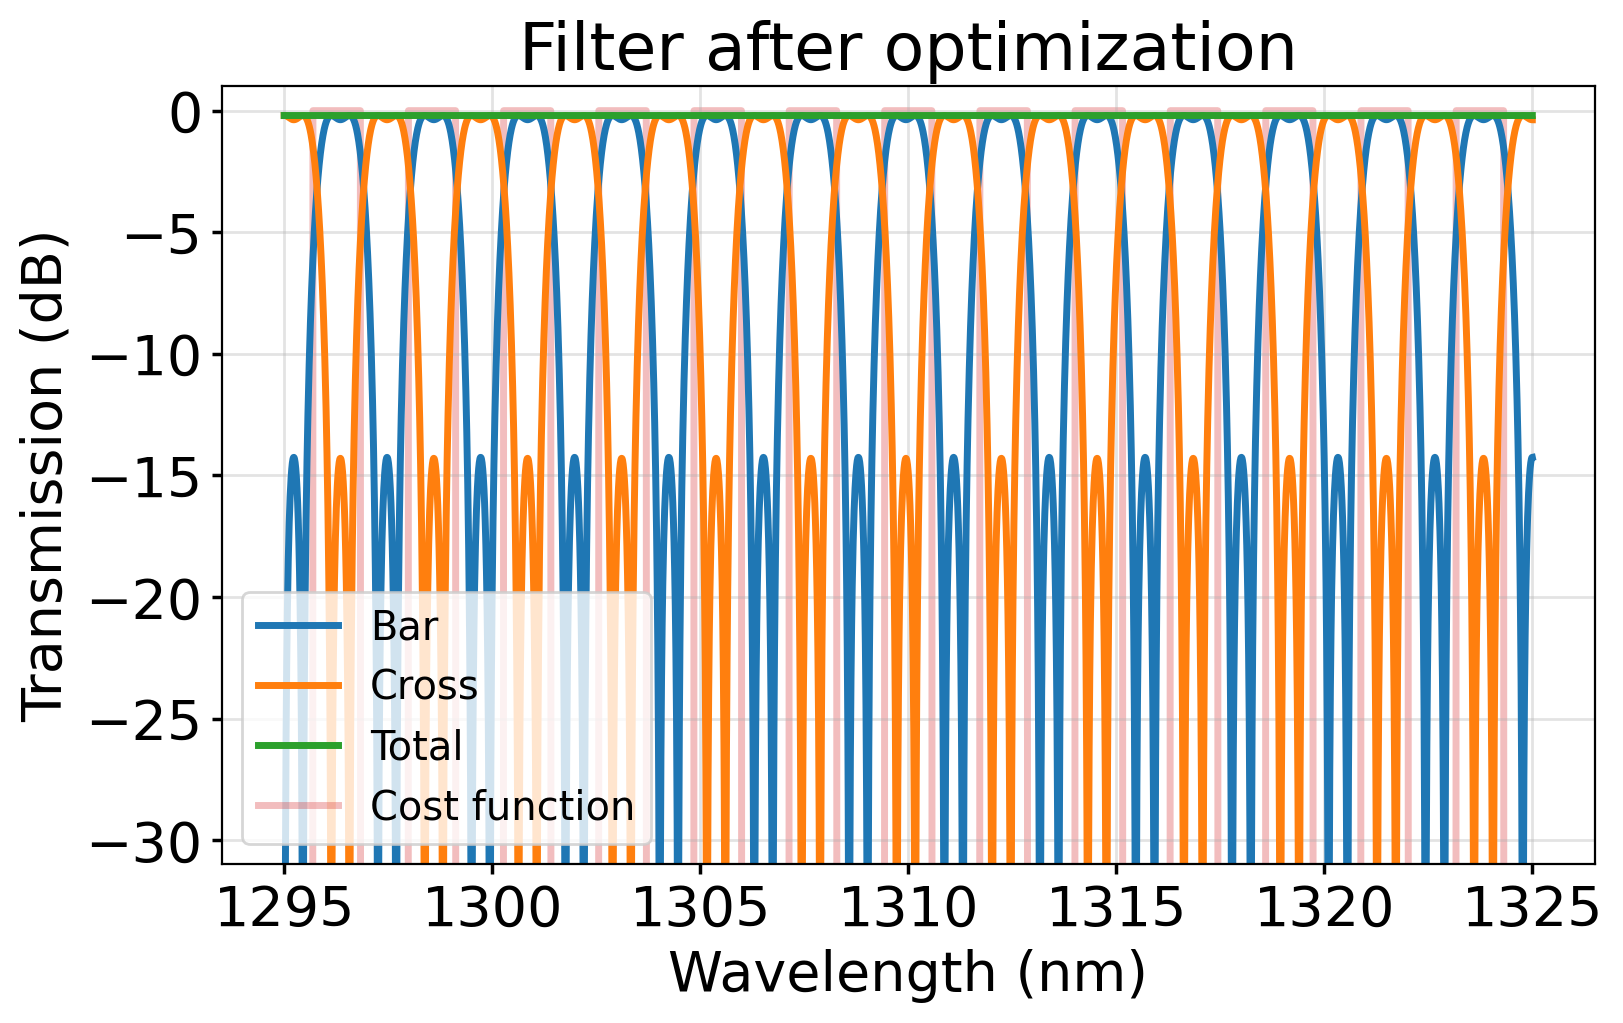

100%|██████████| 500/500 [05:39<00:00,  1.47it/s]


Idd_width:  4  Width:  4.0 um
dL for 400Ghz FSR:  0.0003877024753964471
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000    1.490670 -0.520769  5098.344785
  10    0.505000    0.635000    0.901472    1.373802 -0.518436  4846.058286
  20    0.498928    0.634573    0.905000    0.521001 -0.513047  2929.565732
  30    0.495000    0.627306    0.905000   -1.103348 -0.501667  1988.836781
  40    0.496215    0.630868    0.905000   -0.435821 -0.508391  1691.307107
  50    0.496251    0.631006    0.905000   -0.460566 -0.508419  1683.955904
  60    0.496658    0.629747    0.905000   -0.551010 -0.515481  1662.935232
  70    0.496185    0.625000    0.905000   -0.596176 -0.575378  1609.357103
  80    0.495300    0.625000    0.905000   -0.580666 -0.757908  1465.858063
  90    0.496183    0.625000    0.905000   -0.768765 -1.588025  1076.951924
 100    0.495883    0.625000    0.905000   -0.926484 -1.845303  1063.153386
 110    0.495804    0.625

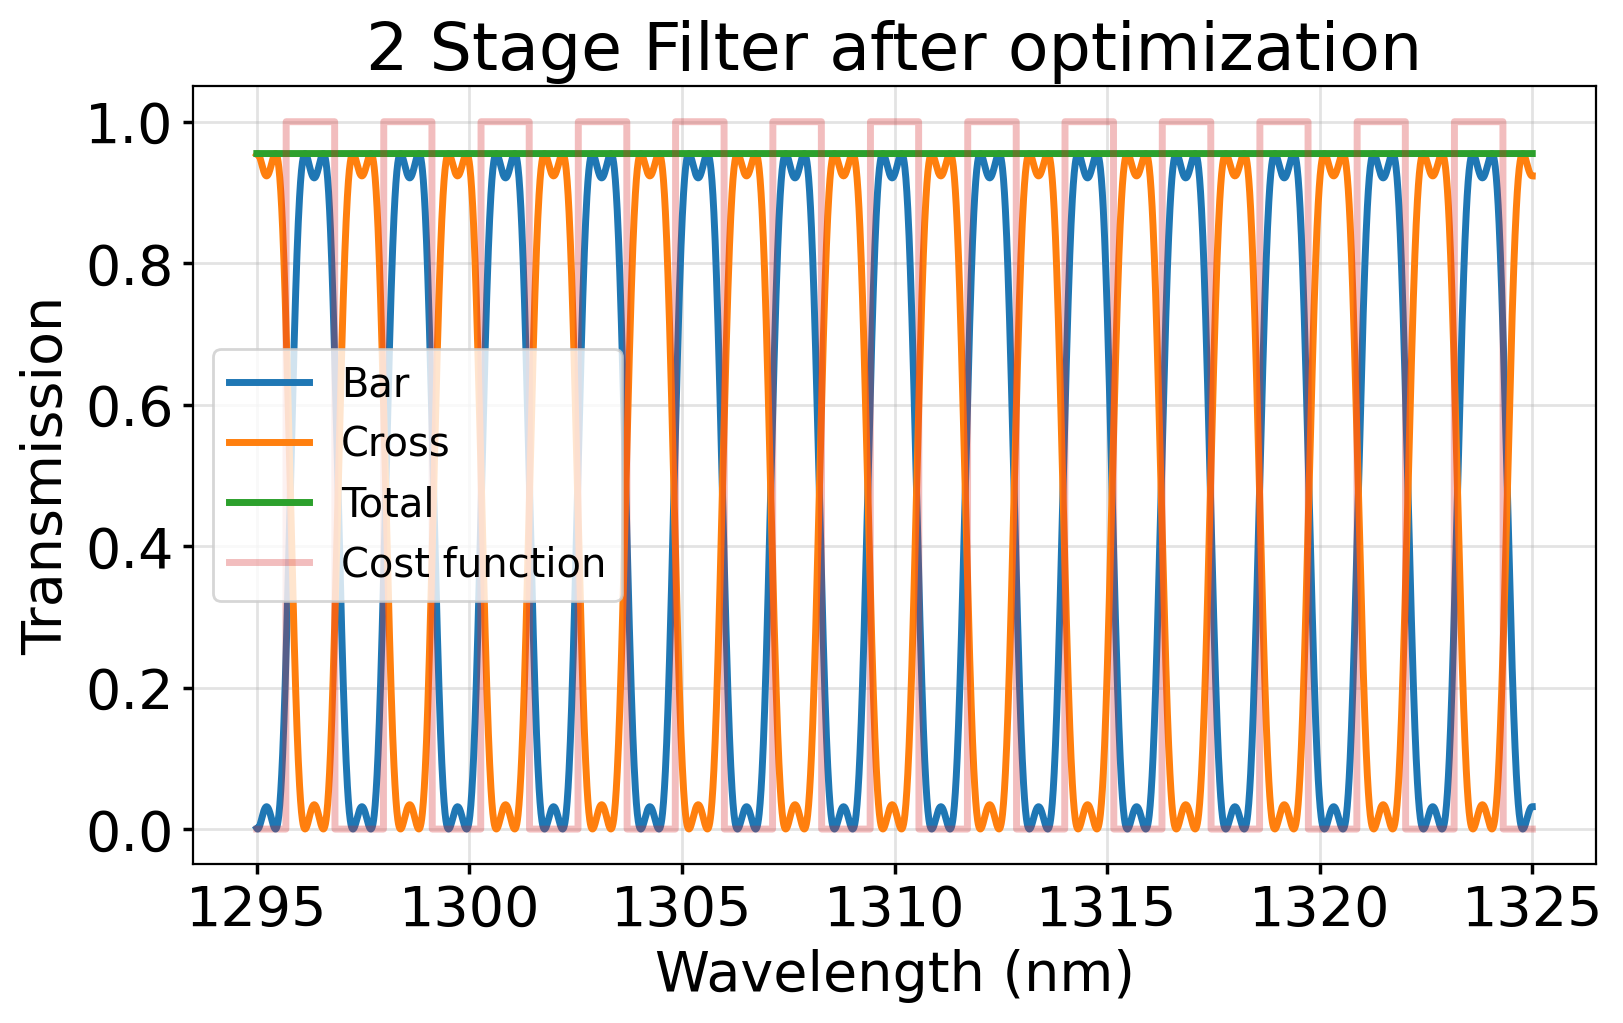

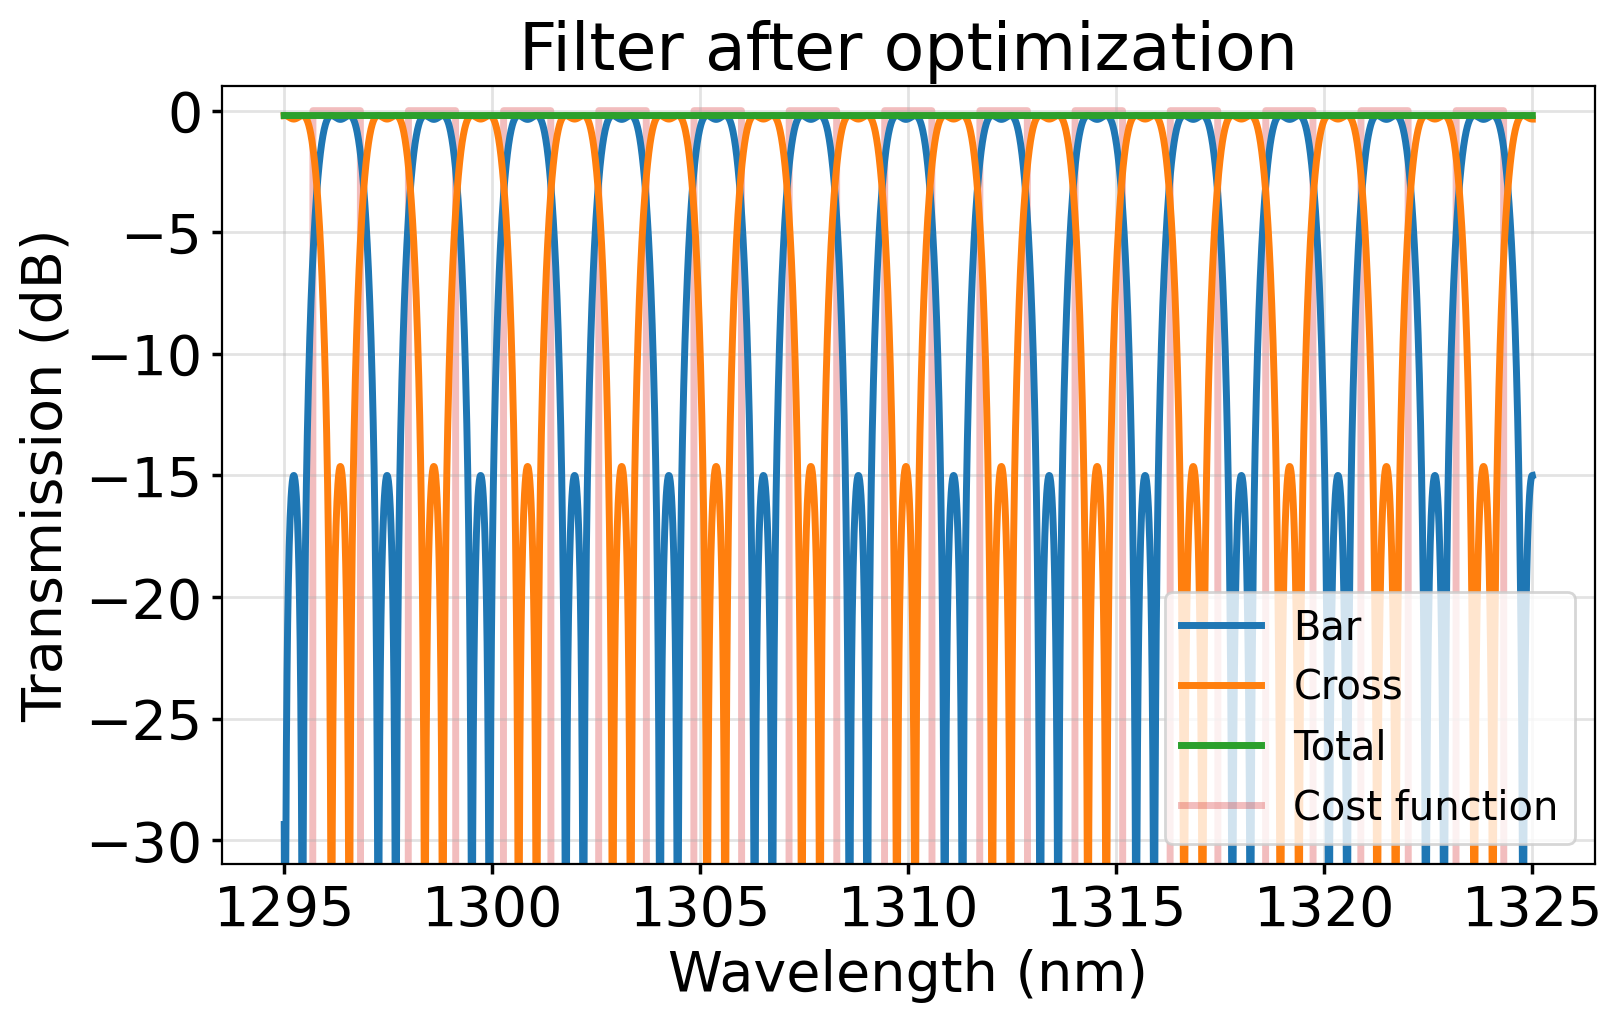

100%|██████████| 500/500 [05:44<00:00,  1.45it/s]


Idd_width:  5  Width:  5.0 um
dL for 400Ghz FSR:  0.00038813675133321637
  #      DC1        DC2        DC3       phi1      phi2       Cost
   0    0.500000    0.630000    0.900000   -1.882272 -1.994340  3452.050305
  10    0.498120    0.626800    0.905000   -1.978644 -2.096450  3311.938396
  20    0.495929    0.625648    0.905000   -2.463736 -2.357126  3088.820978
  30    0.495000    0.626077    0.903245   -2.787510 -3.125027  2767.132721
  40    0.495000    0.629222    0.900389   -3.390547 -5.059782  2008.447833
  50    0.505000    0.628286    0.898564   -2.968835 -5.244725  1242.156541
  60    0.503466    0.630884    0.899046   -3.250080 -6.143356  1631.082110
  70    0.504718    0.628017    0.898575   -2.683437 -5.163619  1070.708182
  80    0.504706    0.627963    0.898503   -2.635475 -5.169283  1060.902359
  90    0.504641    0.628021    0.898543   -2.591182 -5.186400  1058.006700
 100    0.504669    0.627956    0.898332   -2.620618 -5.201539  1058.225254
 110    0.504501    0.62

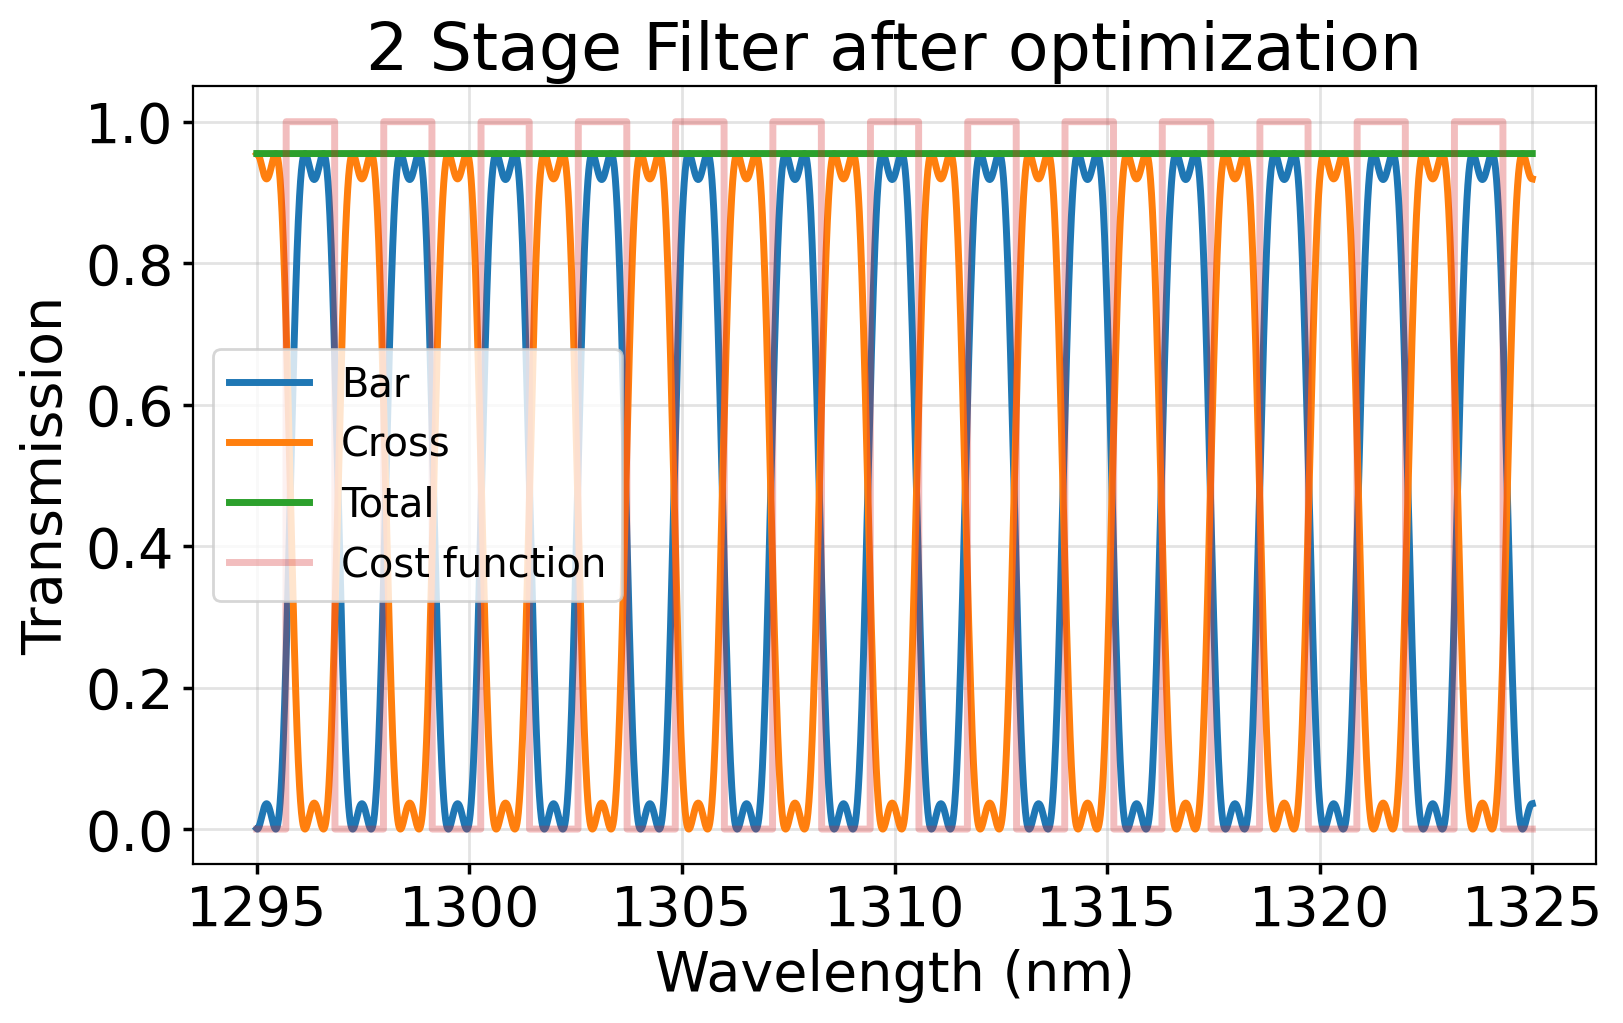

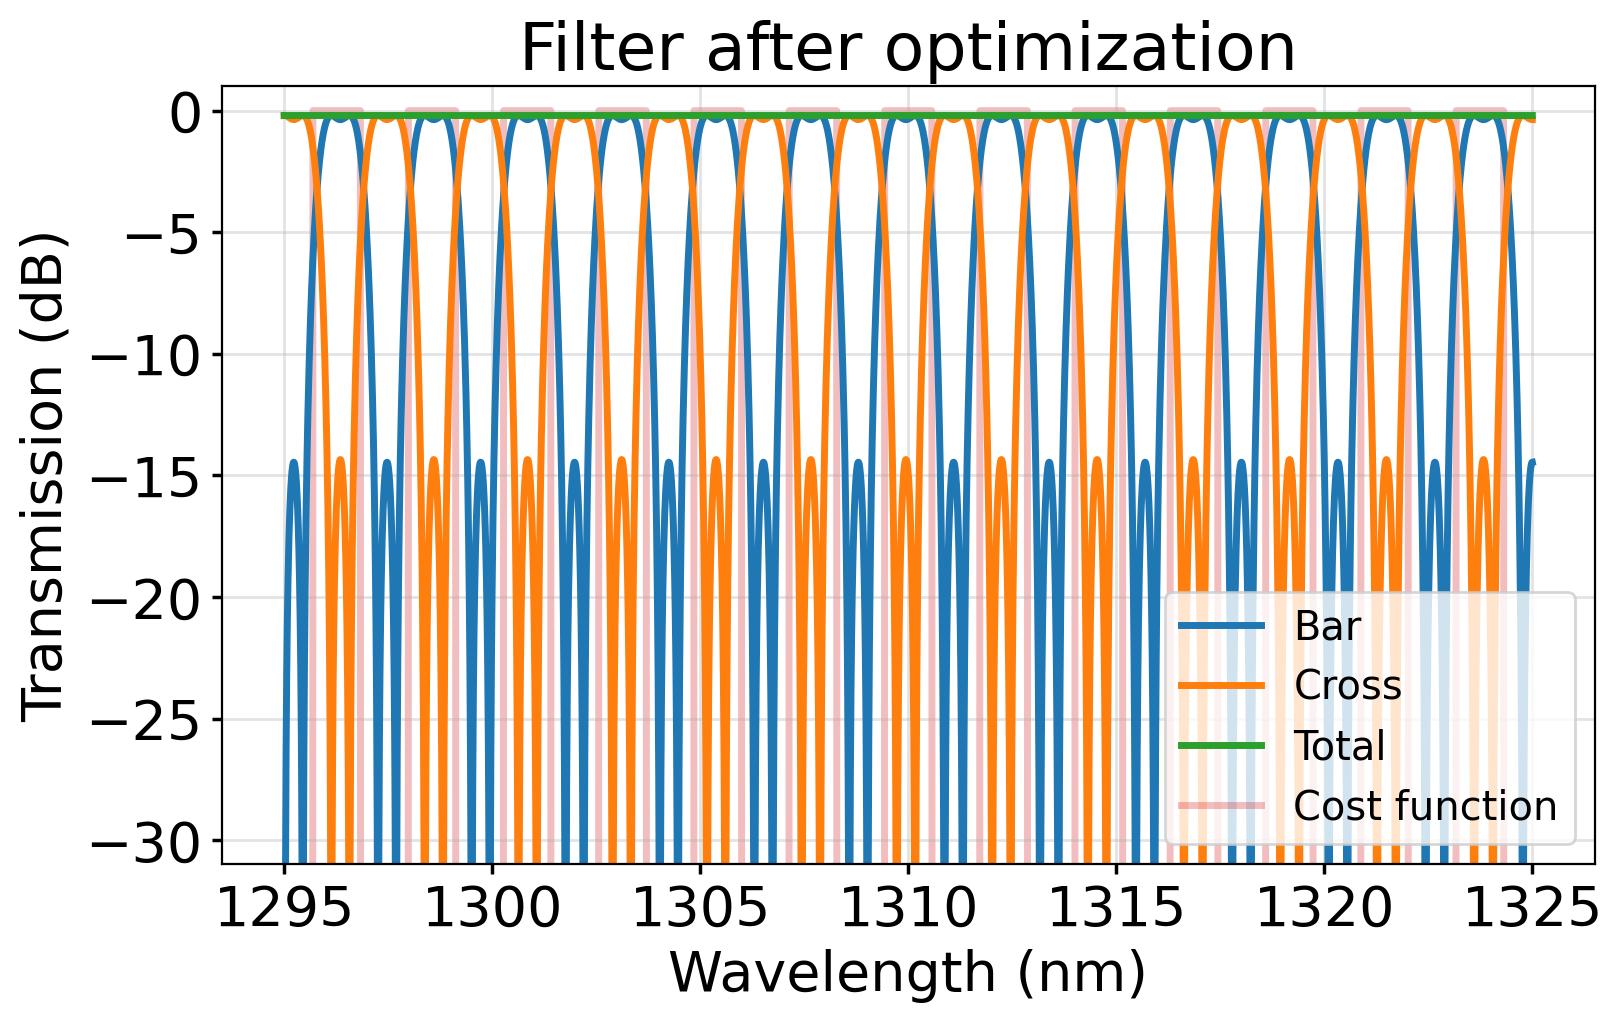

100%|██████████| 500/500 [05:40<00:00,  1.47it/s]


In [5]:
# Create compound effect of the three filter stages on top of each other

um = 1e-6

interleaver_dataset = {}

idd_interleaver = 1
um = 1e-6

for idd_width, width in enumerate(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values):
    print("Idd_width: ", idd_width," Width: ", width, "um")
    print("dL for 400Ghz FSR: ", dL_400Ghz_FSR[idd_width])
    interleaver_400Ghz_FSR = interleaver_2_stage_calc(
        L = 350*um,
        dL1 = dL_400Ghz_FSR[idd_width],
        dL2 = 2*dL_400Ghz_FSR[idd_width],
        dc1 = 0.5,
        dc2 = 0.63,
        dc3 = 0.9,
        effective_index = SiN_effective_index[idd_width],
        group_index = SiN_group_index[idd_width],
        FSR_wavelength = FSR_wavelength,
        SiN_propagation_loss_dB_m = SiN_directional_coupler_loss_dB,
        XPS_first_stage_loss_dB = XPS_first_stage_loss_dB,
        SiN_directional_coupler_loss_dB = SiN_directional_coupler_loss_dB,
    )
    interleaver_400Ghz_FSR.channel_spacing = FSR_wavelength/8

    interleaver_400Ghz_result = interleaver_400Ghz_FSR.minimize_cost_function(random_dc=False,random_phase=True,printy=True)

    wav,bar_port_amp,cross_port_amp = interleaver_400Ghz_FSR.calculate_spectrum(*interleaver_400Ghz_result.x)

    print("First stage insertion loss (dB): ", np.max(10*np.log10(bar_port_amp)))

    interleaver_400Ghz_FSR.plot_spectrum(interleaver_400Ghz_result)


    for sim_mode in simulation:
        for dc_mode in dc_variability:
            for sigma in random_variable_sigma:
                for idd_rand in tqdm(range(num_sweep)):
                    interleaver_dc1 = rand_dc1[sigma][idd_rand] * interleaver_400Ghz_result.x[0]
                    interleaver_dc2 = rand_dc2[sigma][idd_rand] * interleaver_400Ghz_result.x[1]
                    interleaver_dc3 = rand_dc3[sigma][idd_rand] * interleaver_400Ghz_result.x[2]
                    if dc_mode == "common":
                        interleaver_dc2 = rand_dc1[sigma][idd_rand] * interleaver_400Ghz_result.x[1]
                        interleaver_dc3 = rand_dc1[sigma][idd_rand] * interleaver_400Ghz_result.x[2]

                    interleaver_dc1 = np.clip(interleaver_dc1, a_min=0, a_max=1)
                    interleaver_dc2 = np.clip(interleaver_dc2, a_min=0, a_max=1)
                    interleaver_dc3 = np.clip(interleaver_dc3, a_min=0, a_max=1)
                    if sim_mode == "montecarlo":
                        effective_index = gf45clo_pdk_sin_neff_ng_variability['neff_freq0'].sel(wg_width_median_array=width, num_samples=idd_rand).values
                        group_index = gf45clo_pdk_sin_neff_ng_variability['ng_freq0'].sel(wg_width_median_array=width, num_samples=idd_rand).values
                    else:
                        effective_index = SiN_effective_index[idd_width]
                        group_index = SiN_group_index[idd_width]

                    variation_interleaver = interleaver_2_stage_calc(
                        L=350*um,
                        dL1 = dL_400Ghz_FSR[idd_width],
                        dL2 = 2*dL_400Ghz_FSR[idd_width],
                        dc1 = interleaver_dc1,
                        dc2 = interleaver_dc2,
                        dc3 = interleaver_dc3,
                        effective_index = effective_index,
                        group_index = group_index,
                        FSR_wavelength = FSR_wavelength,
                        SiN_propagation_loss_dB_m = SiN_directional_coupler_loss_dB,
                        XPS_first_stage_loss_dB = XPS_first_stage_loss_dB,
                        SiN_directional_coupler_loss_dB = SiN_directional_coupler_loss_dB,
                    )
                    variation_interleaver.channel_spacing = FSR_wavelength/8

                    variation_interleaver.phase_shift_1_top = interleaver_400Ghz_result.x[3]
                    variation_interleaver.phase_shift_2_top = interleaver_400Ghz_result.x[4]

                    new_dev_params = [
                        interleaver_dc1,
                        interleaver_dc2,
                        interleaver_dc3,
                        interleaver_400Ghz_result.x[3],
                        interleaver_400Ghz_result.x[4],
                    ]

                    wav, bar_port_amp, cross_port_amp = variation_interleaver.calculate_spectrum(*new_dev_params)
                    bar_port_fom = calculate_spectrum_bandwidth(wav, bar_port_amp, IL_channel_offset = channel_offset_list, center_wavelength=center_wavelength)
                    cross_port_fom = calculate_spectrum_bandwidth(wav, bar_port_amp, IL_channel_offset = channel_offset_list, center_wavelength=center_wavelength)

                    interleaver_dataset[idd_interleaver] = {
                        "wg_width":gf45clo_pdk_sin_neff_ng_variability['wg_width'].sel(wg_width_median_array=width, num_samples=idd_rand).values,
                        "wg_height":gf45clo_pdk_sin_neff_ng_variability['wg_height'].sel(wg_width_median_array=width, num_samples=idd_rand).values,
                        "wg_sidewall_angle":gf45clo_pdk_sin_neff_ng_variability['wg_sidewall_angle'].sel(wg_width_median_array=width, num_samples=idd_rand).values,
                        "neff":effective_index,
                        "ng":group_index,
                        "simulation_mode": sim_mode,
                        "dc_variability_mode":dc_mode,
                        "sigma":sigma,
                        "interleaver_dc1": interleaver_dc1,
                        "interleaver_dc2": interleaver_dc2,
                        "interleaver_dc3": interleaver_dc3,
                        "wav": wav,
                        "bar_port_amp": bar_port_amp,
                        "cross_port_amp": cross_port_amp,
                        "bar_port_fom": bar_port_fom,
                        "cross_port_fom": cross_port_fom
                    }

                    idd_interleaver += 1

In [6]:
bar_port_amp_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, len(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values), len(wav)))
cross_port_amp_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, len(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values), len(wav)))
bar_port_fom_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, len(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values), 7, 8))
cross_port_fom_xr = np.zeros((len(simulation), len(dc_variability), len(random_variable_sigma), num_sweep, len(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values), 7, 8))

wg_params_xr = np.zeros((len(simulation), 6, num_sweep))
dc_params_xr = np.zeros((len(simulation),len(random_variable_sigma), 3, num_sweep))

wg_params = ["wg_width","wg_height","wg_sidewall_angle","wg_width_median_array","neff","ng"]
dc_params = ["dc1","dc2", "dc3"]
fom_params = ["1dB_bandwidth","channel_center_frequency","min_dc_il_bandwidth","rf_il_dB","min_dc_il_dB","ave_dc_il_dB","ripple_dc_il_dB"]

for idd_sim_mode, sim_mode in enumerate(simulation):
    for idd_dc_mode, dc_mode in enumerate(dc_variability):
        for idd_sigma_mode,sigma in enumerate(random_variable_sigma):
            for idd_rand, num in enumerate(range(num_sweep)):
                for idd_width, width in enumerate(gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values):
                    idd_dict = idd_width * len(simulation)*len(dc_variability) * len(random_variable_sigma)*num_sweep + idd_sim_mode * len(dc_variability) * len(random_variable_sigma)* num_sweep + idd_dc_mode*len(random_variable_sigma) * num_sweep + idd_sigma_mode * num_sweep + idd_rand
                    bar_port_amp_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][:] = interleaver_dataset[idd_dict+1]["bar_port_amp"]
                    cross_port_amp_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][:] = interleaver_dataset[idd_dict+1]["cross_port_amp"]
                    
                    for idd_fom, fom_params_name in enumerate(fom_params):
                        bar_port_fom_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][idd_fom][:] = interleaver_dataset[idd_dict+1]["bar_port_fom"][fom_params_name].flatten()
                        cross_port_fom_xr[idd_sim_mode][idd_dc_mode][idd_sigma_mode][idd_rand][idd_width][idd_fom][:] = interleaver_dataset[idd_dict+1]["cross_port_fom"][fom_params_name].flatten()
                        
                    
                    for idd_wg_params, wg_params_name in enumerate(wg_params):
                        if wg_params_name == "wg_width_median_array":
                            wg_params_xr[idd_sim_mode][idd_wg_params][idd_rand] = width
                        else:
                            wg_params_xr[idd_sim_mode][idd_wg_params][idd_rand] = interleaver_dataset[idd_dict+1][wg_params_name]
                            
                for idd_dc_params, dc_params_name in enumerate(dc_params):
                    dc_params_xr[idd_sim_mode][idd_sigma_mode][idd_dc_params][idd_rand] = interleaver_dataset[idd_dict+1]["interleaver_"+dc_params_name]

In [7]:
interleaver_2_stage_dataset = xr.Dataset(
    data_vars = dict(
        bar_port_amp = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand","route_wg", "wavelength"], bar_port_amp_xr),
        cross_port_amp = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand", "route_wg", "wavelength"], cross_port_amp_xr),
        bar_port_fom = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand","route_wg", "fom_params","idd_fom"], bar_port_fom_xr),
        cross_port_fom = (["sim_mode","dc_variability_mode","dc_sigma","idd_rand", "route_wg", "fom_params","idd_fom"], cross_port_fom_xr),
        wg = (["sim_mode","wg_params","idd_rand"], wg_params_xr),
        dc = (["sim_mode","dc_sigma", "dc_params","idd_rand"], dc_params_xr)
    ),
    coords = dict(
        sim_mode = simulation,
        dc_variability_mode = dc_variability,
        dc_sigma = random_variable_sigma,
        idd_rand = range(num_sweep),
        route_wg = gf45clo_pdk_sin_neff_ng_variability['wg_width_median_array'].values,
        wavelength = wav,
        dc_params = dc_params,
        wg_params = wg_params,
        fom_params = fom_params,
        idd_fom = ["ch1", "ch2", "ch3", "ch4", "ch5", "ch6", "ch7", "ch8"],
        channel_offset = channel_offset_list
    ),
    attrs = dict(description = "Interleaver 2 stage data")
)

In [8]:
interleaver_2_stage_dataset

<xarray.Dataset>
Dimensions:              (sim_mode: 1, dc_variability_mode: 1, dc_sigma: 3,
                          idd_rand: 500, route_wg: 6, wavelength: 4000,
                          fom_params: 7, idd_fom: 8, wg_params: 6,
                          dc_params: 3, channel_offset: 8)
Coordinates:
  * sim_mode             (sim_mode) <U10 'montecarlo'
  * dc_variability_mode  (dc_variability_mode) <U6 'common'
  * dc_sigma             (dc_sigma) float64 0.02 0.05 0.1
  * idd_rand             (idd_rand) int64 0 1 2 3 4 5 ... 495 496 497 498 499
  * route_wg             (route_wg) float64 0.8 1.4 2.0 3.0 4.0 5.0
  * wavelength           (wavelength) float64 1.295e-06 1.295e-06 ... 1.325e-06
  * dc_params            (dc_params) <U3 'dc1' 'dc2' 'dc3'
  * wg_params            (wg_params) <U21 'wg_width' 'wg_height' ... 'neff' 'ng'
  * fom_params           (fom_params) <U24 '1dB_bandwidth' ... 'ripple_dc_il_dB'
  * idd_fom              (idd_fom) <U3 'ch1' 'ch2' 'ch3' ... 'ch6' 'ch7' 'ch8'
  * channel_offset       (channel_offset) float64 0.0 1e+10 ... 6e+10 7e+10
Data variables:
    bar_port_amp         (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, wavelength) float64 ...
    cross_port_amp       (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, wavelength) float64 ...
    bar_port_fom         (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, fom_params, idd_fom) float64 ...
    cross_port_fom       (sim_mode, dc_variability_mode, dc_sigma, idd_rand, route_wg, fom_params, idd_fom) float64 ...
    wg                   (sim_mode, wg_params, idd_rand) float64 4.999 ... 1.943
    dc                   (sim_mode, dc_sigma, dc_params, idd_rand) float64 0....
Attributes:
    description:  Interleaver 2 stage data

In [9]:
interleaver_2_stage_dataset.to_netcdf("interleaver_2_stage_dataset.nc")